In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def command_freq(t_DC, pps, step, rst, num_pulse, target_freq, t_stable, proc_interval):

    num_step = np.ceil((num_pulse-pps)*target_freq/step) #stableに到達するまでの段数

    time = np.arange(0, t_DC+num_step*rst+t_stable, proc_interval, dtype=np.float32)
    freq = np.zeros(int((t_DC+num_step*rst+t_stable)*(1/proc_interval)), dtype=np.float32)

    n_DC = int(np.round(t_DC/proc_interval))  #DCの速度指令値=0rps
    freq[:n_DC] = 0.0

    n_rst = int(np.round(rst/proc_interval))  #加速中の速度指令値
    freq[n_DC: int(n_DC+n_rst*num_step)] = [pps/num_pulse + target_freq/num_pulse*step*(i+1) for i in range(int(num_step)) for j in freq[int(n_DC+i*n_rst): int(n_DC+(i+1)*n_rst)]]

    #Stableの速度指令値
    freq[int(n_DC+n_rst*num_step):] = target_freq

    return time, freq

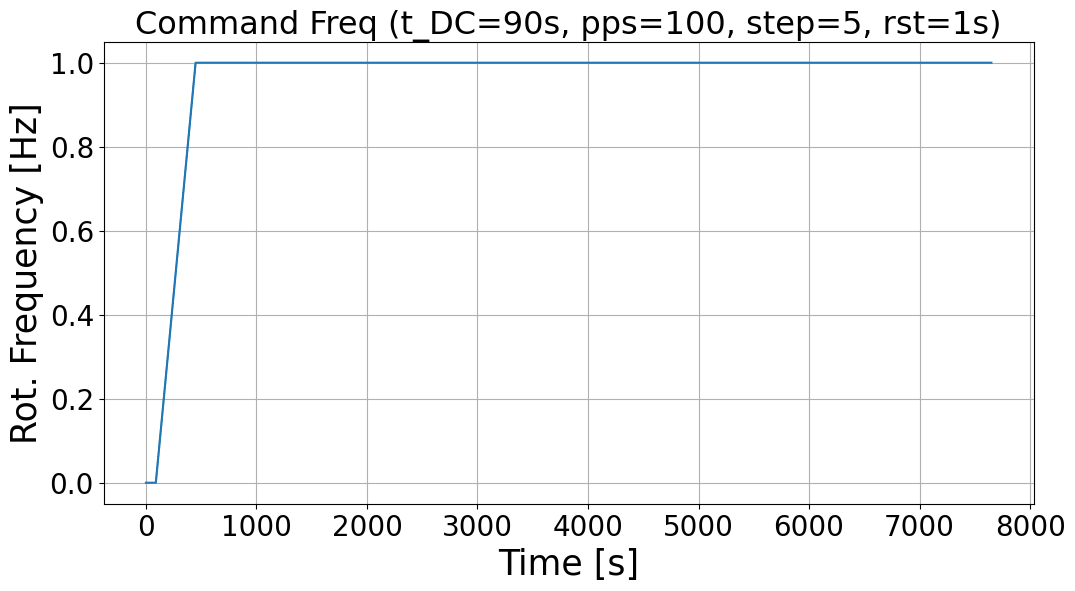

In [28]:
t_DC = 90 #DCの時間[s]
pps = 0 #初期ステップ数[pps]
step = 100
rst = 1
num_pulse = 36000 #1rpsに対応する1秒間のパルス数
target_freq = 1
t_stable = 60*60*2 #stableの時間[s]
proc_interval = 0.125 #データの時間間隔[s]
time = command_freq(t_DC, pps, step, rst, num_pulse, target_freq, t_stable, proc_interval)[0]
freq = command_freq(t_DC, pps, step, rst, num_pulse, target_freq, t_stable, proc_interval)[1]

#time, freq = command_frequency(
#    t_dc=t_DC,
#    step_angle=step,
#    ramp_step_duration=rst,
#    target_freq=target_freq,
#    sample_dt=proc_interval,
#    stable_duration=t_stable
#)

fig = plt.figure(figsize = (12,6))

plt.plot(time, freq, label='Command Freq [rps]')

plt.title('Command Freq (t_DC=90s, pps=100, step=5, rst=1s)',fontsize=23)
plt.xlabel('Time [s]',fontsize=25)
plt.ylabel('Rot. Frequency [Hz]',fontsize=25)
plt.tick_params(labelsize = 20)
#plt.xlim(0,100)
#plt.ylim(0,0.9)
#plt.legend(fontsize=15)
plt.grid()
#print(len(B_signal_list))
plt.show()

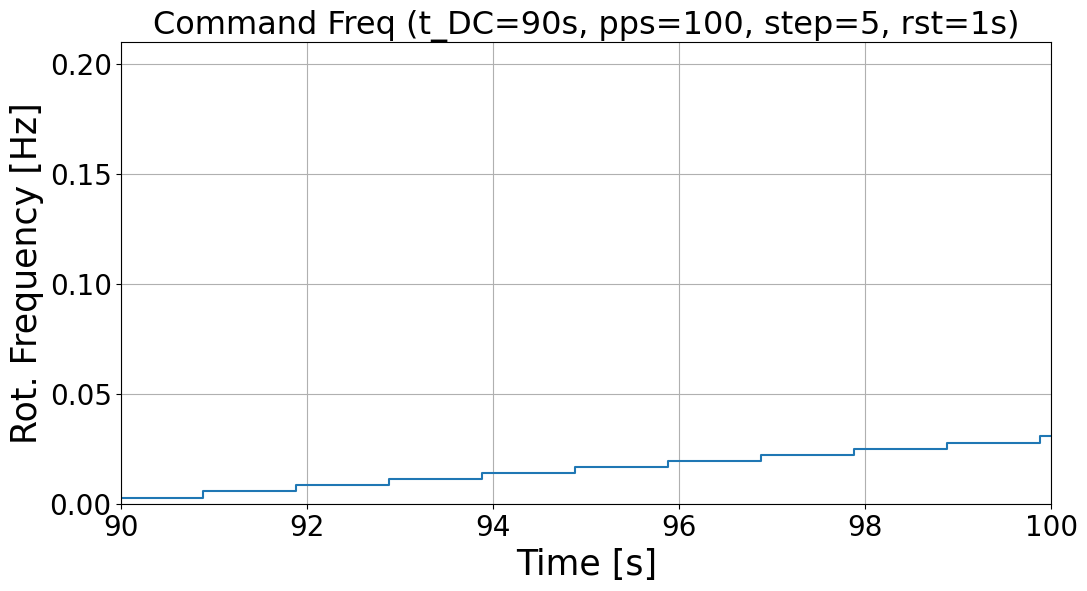

In [31]:
fig = plt.figure(figsize = (12,6))

plt.step(time, freq, label='Command Freq [rps]')
plt.scatter(time[:100], freq[:100], label='Command Freq [rps]', color='red')

plt.title('Command Freq (t_DC=90s, pps=100, step=5, rst=1s)',fontsize=23)
plt.xlabel('Time [s]',fontsize=25)
plt.ylabel('Rot. Frequency [Hz]',fontsize=25)
plt.tick_params(labelsize = 20)
plt.xlim(50,80)
plt.xlim(90,100)
plt.ylim(0,0.21)
#plt.legend(fontsize=15)
plt.grid()
#print(len(B_signal_list))
plt.show()

In [27]:
freq

array([0.00277778, 0.00277778, 0.00277778, ..., 1.        , 1.        ,
       1.        ], dtype=float32)